In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


# Load dataset
file_path = r"C:\Users\Asus\Desktop\DATA_WEATHER.csv"
df = pd.read_csv(file_path)


#DATA CLEANING
df.isnull().sum()



Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [65]:
# Check for duplicates
df.duplicated().sum()

24

In [66]:
# dropping missing values
df = df.dropna()

# dropping duplicates
df = df.drop_duplicates()

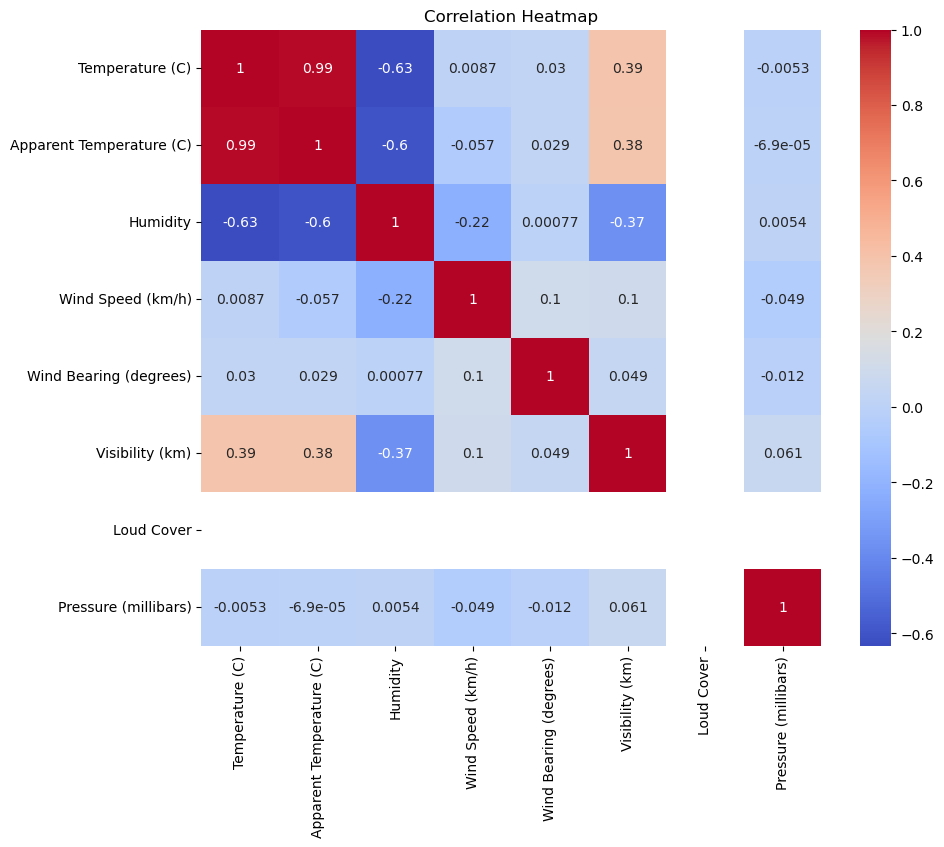

In [67]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

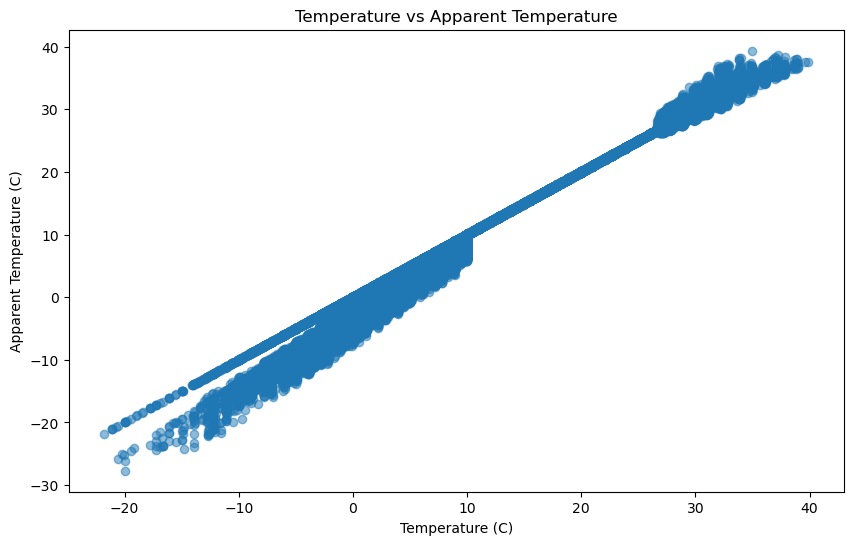

In [68]:
# visualize data
plt.figure(figsize=(10, 6))
plt.scatter(df['Temperature (C)'], df['Apparent Temperature (C)'], alpha=0.5)
plt.title('Temperature vs Apparent Temperature')
plt.xlabel('Temperature (C)')
plt.ylabel('Apparent Temperature (C)')
plt.show()

In [69]:
# Handling Outliers
df_original = df.copy()
columns_with_outliers = ['Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Pressure (millibars)']

Q1 = df[columns_with_outliers].quantile(0.25)
Q3 = df[columns_with_outliers].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.0 * IQR
upper_bound = Q3 + 1.0 * IQR
outlier_mask = False
for col in columns_with_outliers:
    col_mask = (df[col] < lower_bound[col]) | (df[col] > upper_bound[col])
    outlier_mask = outlier_mask | col_mask
    
# Get the outlier rows
outliers = df[outlier_mask]
print(f"Number of rows with outliers: {len(outliers)}")

# cap the outliers
for col in columns_with_outliers:
    df[col] = df[col].clip(lower=lower_bound[col], upper=upper_bound[col])

Number of rows with outliers: 17531


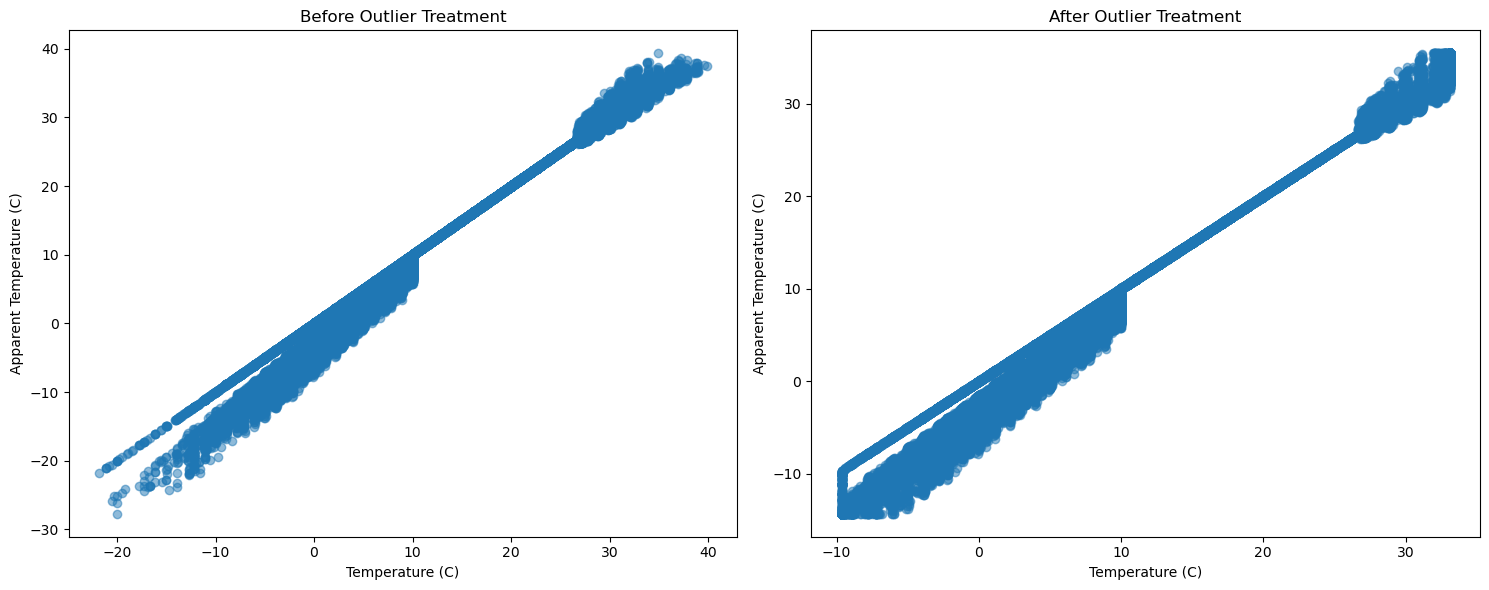

In [70]:
# Visualize the diffference
plt.figure(figsize=(15, 6))

# Before outlier treatment
plt.subplot(1, 2, 1)
plt.scatter(df_original['Temperature (C)'], df_original['Apparent Temperature (C)'], alpha=0.5)
plt.title('Before Outlier Treatment')
plt.xlabel('Temperature (C)')
plt.ylabel('Apparent Temperature (C)')

# After outlier treatment
plt.subplot(1, 2, 2)
plt.scatter(df['Temperature (C)'], df['Apparent Temperature (C)'], alpha=0.5)
plt.title('After Outlier Treatment')
plt.xlabel('Temperature (C)')
plt.ylabel('Apparent Temperature (C)')

plt.tight_layout()
plt.show()

In [71]:
# Define features and target variable
X = numeric_df.drop(columns=['Apparent Temperature (C)'])
y = numeric_df['Apparent Temperature (C)']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
print(y_pred)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse, r2

[ 8.03949217 19.85818326 21.70168465 ...  0.58199485 11.0737304
 -1.81987287]


(1.1682429029044843, 0.9898754414681226)